## 창녕군 메뚜기 쌀 2019년 review 데이터

In [4]:
from konlpy.tag import Okt
from collections import Counter
import wordcloud

import numpy as np  
import pandas as pd

#이미지 불러와서 사용할 것
from PIL import Image  
import matplotlib.pyplot as plt 

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 봄여름 가을 겨울 트렌드 

In [5]:
text19sp = pd.read_excel("19_봄_메뚜기.xlsx")
text19su = pd.read_excel("19_여름_메뚜기.xlsx")
text19au = pd.read_excel("19_가을_메뚜기.xlsx")
text19wi = pd.read_excel("19_겨울_메뚜기.xlsx")

In [7]:
text19sp['내용'][0]

'쌀 반정도 부었는데\n돌맹이 나왔어요 ㅡㅡ::\n손톱으로 누르니 돌이네요..\n왜 이런게 들어가는거죠?\n\n이건 포장 뜯어서 쌀통에 붓자마자 나와 다행이라고 해야하나\n이거 하나때문에 교환도 힘들거 같고...\n\n좀 위생에 신경 쓰셔야 할거 같네요.\n이거 아기가 먹었어봐요...\n충수염이라도 오면 어쩌려고....\n이건 쿠팡에서 신경써야 할것같은데요?\n먹는거자나요 것도 매일 하루세끼 먹는 쌀인데..ㅡㅡ\n진짜 쌀 사서 이물질 나온거 처음이예요;;;'

In [44]:
len(text19au)

211

In [45]:
# 판다스의 데이터 프레임으로 가져온 text를 str로 저장
sp=" "
for i in range(195):
    sp+=text19sp['내용'][i]

su=" "
for i in range(226):
    su+=text19su['내용'][i]

au=" "
for i in range(211):
    au+=text19au['내용'][i]

wi=" "
for i in range(160):
    wi+=text19wi['내용'][i]  

## Okt 형태소분석기 사용
from konlpy.tag import Okt

Okt()는 stem=True, norm=True의 파라미터로 단어들 1차적인 정규화, 오타 수정가능

- morphs(text ) :텍스트에서 형태소를 반환한다
- nouns(text ) :텍스트에서 명사를 반환한다
- phrases(text ) :텍스트에서 어절을 뽑아낸다
- pos(text ) :텍스트에서 품사 정보를 부착하여 반환한다

In [46]:
# 명사추출
okt = Okt()
nouns_list_sp = okt.nouns(sp)
nouns_list_su = okt.nouns(su)
nouns_list_au = okt.nouns(au)
nouns_list_wi = okt.nouns(wi)

In [59]:
# 제거할 단어 지정
stopwords= [ '구매','쿠팡','완전','전혀',
            '마침', '처럼', '수도', '얼마나', '물건', '그거', '이구', '감사', '이건', 
            '가나', '어도', '만해', '이후', '주문', '김치냉장고','하니','경우','별로',
            '중간', '걱정', '고민', '이번','편이', '매우', '일이', '그닥', '무엇', '거나', 
            '런가', '사진', '의사', '밥솥', '와우','쌀통','거의','거의','수령','오늘','언제', 
            '의사', '구입','혹시', '밥통','거기','압력밥솥', '사면', '계속', '그때','물질', 
            '절대', '혹시','가지','그동안','우선', '사실','도저히', '어디', '다행', '고해', 
            '먼저', '뭔가', '결론', '편입', '지은','보이', '워낙','건가' ,'다만','장난', 
            '전체','나름','짜증','순간', '실패','마음','지고', '갈수록', '끼리', '고요', 
            '듭니', '살이', '본적','리가', '번은','냉장고','라미', '어차피','어서', '쓰기',
            '사도','이면','또한','비지', '별루', '갑자기','지도','모든', '안해','만큼','하나',
            '등등', '온건', '살짝', '중이', '고생', '아래','양호' '저번', '해당', '진심', 
            '기분', '정말', '겨우', '전기','정일', '느낌', '일도','물질', '저녁',  '아침',
            '이틀', '만족', '조금', '판매', '기대', '선택', '을해', '시간','이용', '몇번',
            '아시', '가장', '여름', '불리', '최고', '보통', '보구', '강추', '불리','그대로',
            '다른','이전','보기', '제발', '제일', '생각',  '그냥', '정도', '가요','한번','작년',
            '우리','신경','로만','벌써', '점점', '시작', '위해','다시','진짜','바로','두번째',
            '자마자','기준','어보', '대해', '당황', '보지', '지난', '그것','실망','예정','최근',
            '기도', '자도', '일단', '인지', '자꾸', '제대로', '가끔','일반','며칠','잘못', '평보',
            '이나', '신청', '대부분', '좀더', '사지','방법','다가','가나', '덕분', '이제', '해먹',
            '여기','사서','부어','거리','어찌','지금','여러', '굳이', '당장', '아주','과정','추천',
            '변동', '문제','저희','무난','최악','남아', '해도', '사려', '때문', '누가', '화가', '작성',
            '무슨','오히려','마지막', '추정', '세상', '사고', '무조건', '깜짝', '대충', '매번','발견',
            '동안','요즘', '별하나', '전이', '양도', '아무', '분명', '수준', '말씀', '달도', '상황', '도나',
            '이기', '된거', '대한', '여러분', '드네', '달이', '하자', '아예', '첨부', '부터', '마다', '차라리',
            '나머지', '한적', '아마', '잡고', '래야', '다해', '이해', '더욱', '지으니', '평균', '요새', '특유', 
            '기본', '난리', '완료', '나중','바닥', '의향', '절반', '건데', '사기', '종종', '하루','역시', 
            '다음', '어제', '개월','유지','먹음', '마리','주로','도움', '쿠쿠', '뚝딱', '차지',
            '섭취', '가까이', '결과', '그게', '일부러','이정','질도', '문해','확인', '내일', '수가','재주','약간',
            '대체로', '사람','자체', '이유', '알도', '음식','도움', '광복', '앞전', '마냥', '원래', '경험', '현재',
            '품평' , '프로', '체적','추가','생수','금방','결정','기억','자주', '얘기','면서', '이하', '보시',
            '이하', '쭈욱', '심지어', '그다지', '달리', '적극','더니','지나''안보', '대략', '도전', '가게','는걸',
            '겨울','도대체','잠시', '통제','포함', '신분', '참고', '이상', '여름철','주말','동기','부분','방금',
            '이상은', '대체','가량', '해결', '노래', '선물','오후','가위','마치', '입안', '만하','물이','댓글',
            '그날','인기','요전','강화','올해','실제','솔직','한참','전부','정물','어른','요청','여기저기',
            '열흘','고집', '시중','냄비','고객','뚜껑','필요','안나']

In [60]:
len(stopwords)

390

In [61]:
# 추가 제거할 단어 선정
plus_stpwd=['밥맛','가격','쌀','밥','구매','상품','메뚜기','제품']

In [62]:
stopwords.extend(plus_stpwd)

In [63]:
len(stopwords)

398

In [66]:
# 데이터 정제
for noun in nouns_list_sp:
    if len(noun) == 1:
      nouns_list_sp.remove(noun)
    if noun in stopwords:
      nouns_list_sp.remove(noun)

for noun in nouns_list_su:
    if len(noun) == 1:
      nouns_list_su.remove(noun)
    if noun in stopwords:
      nouns_list_su.remove(noun)

for noun in nouns_list_au:
    if len(noun) == 1:
      nouns_list_au.remove(noun)
    if noun in stopwords:
      nouns_list_au.remove(noun)

for noun in nouns_list_wi:
    if len(noun) == 1:
      nouns_list_wi.remove(noun)
    if noun in stopwords:
      nouns_list_wi.remove(noun)

## 빈도 파악
리스트의 값의 빈도를 구해 딕셔너리로 반환

from collections import Counter

In [67]:
# 명사별 빈도구해 딕셔너리로 저장
cnt_sp = Counter(nouns_list_sp)
cnt_su = Counter(nouns_list_su)
cnt_au = Counter(nouns_list_au)
cnt_wi = Counter(nouns_list_wi)

##워드클라우드 생성

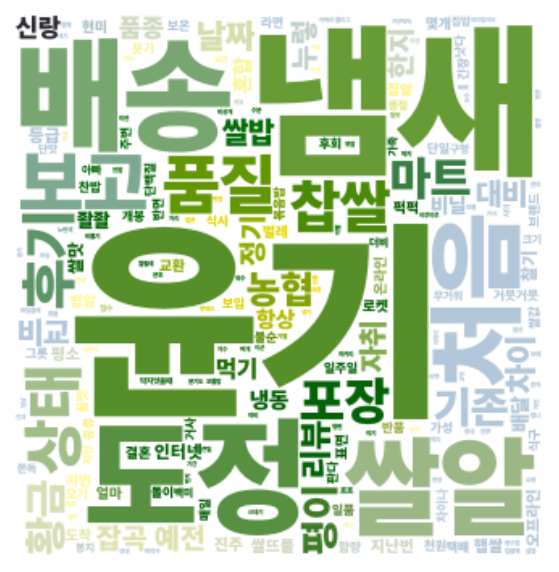

<Figure size 432x288 with 0 Axes>

In [68]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open("잘살아보세.png"))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path="Pretendard-Black.otf",
                                  background_color="white", mask=img).generate_from_frequencies(cnt_sp)

plt.figure(figsize=(5, 5))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()

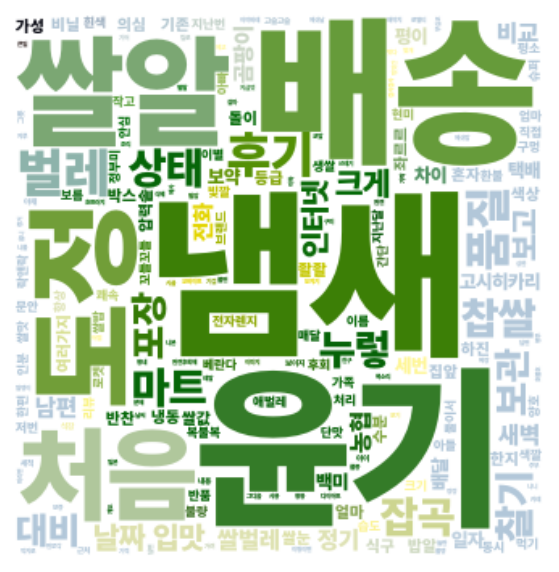

<Figure size 432x288 with 0 Axes>

In [69]:
cloud_image = wordcloud.WordCloud(font_path="Pretendard-Black.otf",
                                  background_color="white", mask=img).generate_from_frequencies(cnt_su)

plt.figure(figsize=(5, 5))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()

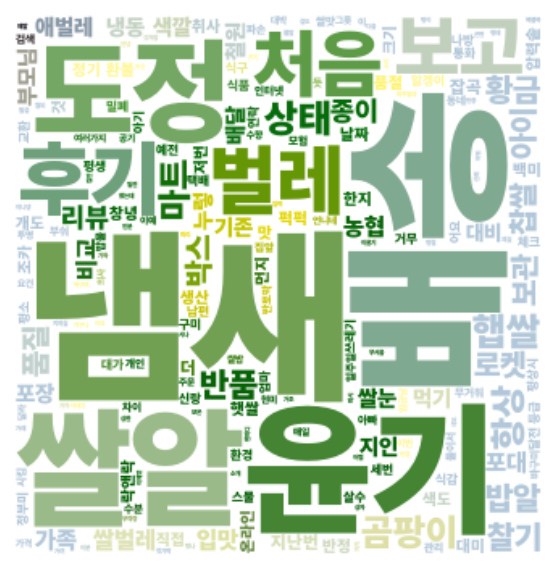

In [70]:
cloud_image = wordcloud.WordCloud(font_path="Pretendard-Black.otf",
                                  background_color="white", mask=img).generate_from_frequencies(cnt_au)

plt.figure(figsize=(5, 5))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()

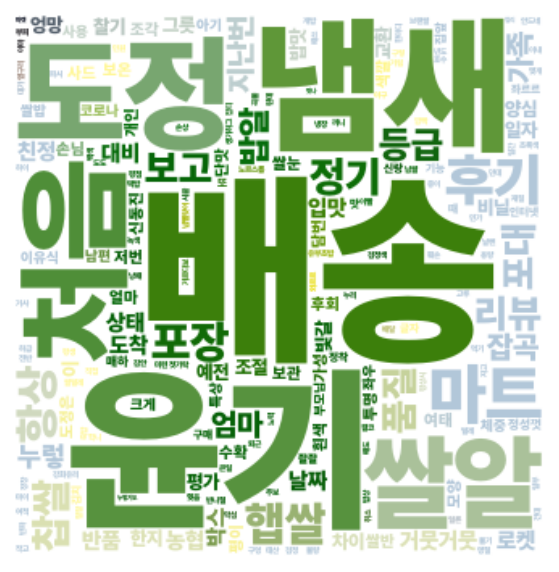

In [71]:
cloud_image = wordcloud.WordCloud(font_path="Pretendard-Black.otf",
                                  background_color="white", mask=img).generate_from_frequencies(cnt_wi)

plt.figure(figsize=(5, 5))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()